<a href="https://colab.research.google.com/github/BlueStar198/Business-Intelligence/blob/main/exemplo_ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ETL: Phython

In [11]:
import pandas as pd

# Extração dos dados da filial 1 (CSV)
vendas_filial1 = pd.read_csv('vendas_filial1.csv')

# Extração dos dados da filial 2 (Excel)
vendas_filial2 = pd.read_excel('vendas_filial2.xlsx')

# Transformações
# Podemos fazer transformações adicionais aqui, se necessário

# Visualização dos dados
print("Dados da Filial 1:")
print(vendas_filial1.head())
print("\nDados da Filial 2:")
print(vendas_filial2.head())

Dados da Filial 1:
   ID do Produto                   Nome do Produto  Quantidade Vendida  \
0            101                Laptop Dell XPS 13                  20   
1            102     Smartphone Samsung Galaxy S20                  30   
2            103          Monitor LG UltraWide 34"                  15   
3            104  Teclado Mecânico Corsair K95 RGB                  25   
4            105        Mouse Logitech MX Master 3                  10   

   Preço Unitário  
0          1500.0  
1          1000.0  
2           600.0  
3           200.0  
4            80.0  

Dados da Filial 2:
   ID do Produto                    Nome do Produto  Quantidade Vendida  \
0            201         Impressora HP LaserJet Pro                  12   
1            202                    SSD Samsung 1TB                  18   
2            203              Tablet Apple iPad Pro                   8   
3            204  Smartwatch Samsung Galaxy Watch 4                  14   
4            205     

In [12]:
#Transformações dos dados: Calcular o valor total de vendas para cada filial
vendas_filial1['Valor Total'] = vendas_filial1['Quantidade Vendida'] * vendas_filial1['Preço Unitário']
vendas_filial2['Valor Total'] = vendas_filial2['Quantidade Vendida'] * vendas_filial2['Preço Unitário']

#visualizar os dados transformados
print("Dados transformados da Filial 1:")
print(vendas_filial1.head())
print("\nDados transformados da Filial 2:")
print(vendas_filial2.head())

Dados transformados da Filial 1:
   ID do Produto                   Nome do Produto  Quantidade Vendida  \
0            101                Laptop Dell XPS 13                  20   
1            102     Smartphone Samsung Galaxy S20                  30   
2            103          Monitor LG UltraWide 34"                  15   
3            104  Teclado Mecânico Corsair K95 RGB                  25   
4            105        Mouse Logitech MX Master 3                  10   

   Preço Unitário  Valor Total  
0          1500.0      30000.0  
1          1000.0      30000.0  
2           600.0       9000.0  
3           200.0       5000.0  
4            80.0        800.0  

Dados transformados da Filial 2:
   ID do Produto                    Nome do Produto  Quantidade Vendida  \
0            201         Impressora HP LaserJet Pro                  12   
1            202                    SSD Samsung 1TB                  18   
2            203              Tablet Apple iPad Pro              

In [13]:
# Carregamento dos dados transformados para um arquivo CSV
vendas_filial1.to_csv('vendas_filial1_transformadas.csv', index=False)
vendas_filial2.to_csv('vendas_filial2_transformadas.csv', index=False)

# Apresentar os dados carregados dos arquivos CSV
dados_filial1 = pd.read_csv('vendas_filial1_transformadas.csv')
dados_filial2 = pd.read_csv('vendas_filial2_transformadas.csv')

print("Dados transformados da filial 1 (do arquivo CSV):")
print(dados_filial1.head())
print("Dados transformados da filial 2 (do arquivo CSV):")
print(dados_filial2.head())

Dados transformados da filial 1 (do arquivo CSV):
   ID do Produto                   Nome do Produto  Quantidade Vendida  \
0            101                Laptop Dell XPS 13                  20   
1            102     Smartphone Samsung Galaxy S20                  30   
2            103          Monitor LG UltraWide 34"                  15   
3            104  Teclado Mecânico Corsair K95 RGB                  25   
4            105        Mouse Logitech MX Master 3                  10   

   Preço Unitário  Valor Total  
0          1500.0      30000.0  
1          1000.0      30000.0  
2           600.0       9000.0  
3           200.0       5000.0  
4            80.0        800.0  
Dados transformados da filial 2 (do arquivo CSV):
   ID do Produto                    Nome do Produto  Quantidade Vendida  \
0            201         Impressora HP LaserJet Pro                  12   
1            202                    SSD Samsung 1TB                  18   
2            203              Ta

In [14]:
import sqlite3

# Criar uma conexão com o banco de dados
conn = sqlite3.connect('dados_transformados.db')

# Carregar os dados transformados para tabelas SQL
vendas_filial1.to_sql('vendas_filial1_transformadas', conn, index=False, if_exists='replace')
vendas_filial2.to_sql('vendas_filial2_transformadas', conn, index=False, if_exists='replace')

# Apresentar os dados carregados das tabelas SQL
dados_filial1 = pd.read_sql('SELECT * FROM vendas_filial1_transformadas', conn)
dados_filial2 = pd.read_sql('SELECT * FROM vendas_filial2_transformadas', conn)

print("Dados transformados da filial 1 (do banco de dados SQL):")
print(dados_filial1.head())
print("Dados transformados da filial 2 (do banco de dados SQL):")
print(dados_filial2.head())

# Fechar a conexão com banco de dados
conn.close()

Dados transformados da filial 1 (do banco de dados SQL):
   ID do Produto                   Nome do Produto  Quantidade Vendida  \
0            101                Laptop Dell XPS 13                  20   
1            102     Smartphone Samsung Galaxy S20                  30   
2            103          Monitor LG UltraWide 34"                  15   
3            104  Teclado Mecânico Corsair K95 RGB                  25   
4            105        Mouse Logitech MX Master 3                  10   

   Preço Unitário  Valor Total  
0          1500.0      30000.0  
1          1000.0      30000.0  
2           600.0       9000.0  
3           200.0       5000.0  
4            80.0        800.0  
Dados transformados da filial 2 (do banco de dados SQL):
   ID do Produto                    Nome do Produto  Quantidade Vendida  \
0            201         Impressora HP LaserJet Pro                  12   
1            202                    SSD Samsung 1TB                  18   
2            203  

In [15]:
import sqlite3

# Criar uma conexão com o banco de dados
conn = sqlite3.connect('dados_transformados.db')

# Criar um cursor para executar consultas SQL
cursor = conn.cursor()

# Executar uma consulta SQL para obter os dados da tabela vendas_filial1_transformadas
cursor.execute('SELECT * FROM vendas_filial1_transformadas')

# Obter os resultados da consulta
dados_filial1 = cursor.fetchall()

#Exibir os dados da filial 1
print("Dados transformados da filial 1:")
for linha in dados_filial1:
  print(linha)

# Executar uma consulta SQL para obter os dados da tabela vendas_filial2_transformadas
cursor.execute('SELECT * FROM vendas_filial2_transformadas')

# Obter os resultados da consulta
dados_filial2 = cursor.fetchall()

#Exibir os dados da filial 2
print("Dados transformados da filial 2:")
for linha in dados_filial2:
  print(linha)

# Fechar a conexão com banco de dados
cursor.close()
conn.close()

Dados transformados da filial 1:
(101, 'Laptop Dell XPS 13', 20, 1500.0, 30000.0)
(102, 'Smartphone Samsung Galaxy S20', 30, 1000.0, 30000.0)
(103, 'Monitor LG UltraWide 34"', 15, 600.0, 9000.0)
(104, 'Teclado Mecânico Corsair K95 RGB', 25, 200.0, 5000.0)
(105, 'Mouse Logitech MX Master 3', 10, 80.0, 800.0)
Dados transformados da filial 2:
(201, 'Impressora HP LaserJet Pro', 12, 250.0, 3000.0)
(202, 'SSD Samsung 1TB', 18, 180.0, 3240.0)
(203, 'Tablet Apple iPad Pro', 8, 900.0, 7200.0)
(204, 'Smartwatch Samsung Galaxy Watch 4', 14, 300.0, 4200.0)
(205, 'Headset HyperX Cloud II', 20, 120.0, 2400.0)


DATA WAREHOUSE EXEMPLO 1


In [16]:
import pandas as pd
import numpy as np

# Esta definindo número de produtos como 600 e em baixo esta criando informacoes sobre os produtos colocando ID, nome e categoria
num_produtos = 600
produtos = {
    'produto_id': range(1, num_produtos + 1),
    'nome': [f'Produto {i}' for i in range(1, num_produtos + 1)],
    'categoria': np.random.choice(['Eletrônicos', 'Roupas', 'Alimentos'], num_produtos)
}

# Os dados dos produtos sao colocado como DataFrame dos Produtos
df_produtos = pd.DataFrame(produtos)

# Esta definindo número de vendas como 1000 e em baixo esta criando informacoes sobre as vendas colocando data, ID, quantidade e valorTotal
num_vendas = 1000
data_vendas = {
    'data': np.random.choice(pd.date_range('2024-04-10', periods=30), num_vendas),  # Gera aleatoriamente os periodos entre a data de 10 de abril de 2024
    'produto_id': np.random.randint(1, num_produtos + 1, num_vendas),  # Gera IDs de produtos aleatórios dentro do intervalo definido
    'quantidade': np.random.randint(50, 200, num_vendas),  # Gera quantidades aleatórias de produtos vendidos
    'valor_total': np.random.randint(1000, 10000, num_vendas)  # Gera valores totais aleatórios para as vendas
}

# Os dados das vendas sao colocado como DataFrame das Vendas
df_vendas = pd.DataFrame(data_vendas)

# Salva os dados das vendas e produtos em arquivos CSV
df_vendas.to_csv('vendas.csv', index=False)
df_produtos.to_csv('produtos.csv', index=False)

# Coloca os arquivos CSV para ser lido em python
df_vendas = pd.read_csv('vendas.csv')
df_produtos = pd.read_csv('produtos.csv')

# Junta os dados transformados de vendas e produtos com base no ID do produto
df_merge = pd.merge(df_vendas, df_produtos, on='produto_id', how='inner')

# Salva os dados juntados acima em um arquivo CSV, que representa o data warehouse
df_merge.to_csv('data_warehouse.csv', index=False)

# Faz a leitura do arquivo CSV do data warehouse para exibir seu conteúdo
df_warehouse = pd.read_csv('data_warehouse.csv')
print("Conteudo do Data Warehouse:")
print(df_warehouse)


Conteudo do Data Warehouse:
           data  produto_id  quantidade  valor_total         nome    categoria
0    2024-04-22         589          60         6249  Produto 589  Eletrônicos
1    2024-04-12         406          52         7715  Produto 406  Eletrônicos
2    2024-05-03         406         130         3451  Produto 406  Eletrônicos
3    2024-04-17          20         136         2496   Produto 20  Eletrônicos
4    2024-04-25          20         107         4772   Produto 20  Eletrônicos
..          ...         ...         ...          ...          ...          ...
995  2024-04-25          83         145         6431   Produto 83       Roupas
996  2024-04-26         248         121         7633  Produto 248  Eletrônicos
997  2024-05-06         294         121         2021  Produto 294  Eletrônicos
998  2024-04-28         213         172         9367  Produto 213  Eletrônicos
999  2024-05-05         508          53         6037  Produto 508  Eletrônicos

[1000 rows x 6 columns]

DATA WAREHOUSE EXEMPLO 2


Análise de vendas por produto:
             quantidade  valor_total
nome                                
Produto 10          334        28027
Produto 101         210        12356
Produto 102         309        10398
Produto 103         189         6795
Produto 104         172        12741
...                 ...          ...
Produto 92          246         9293
Produto 93          289        14092
Produto 95          139         1933
Produto 96          609        32510
Produto 99           53         9211

[482 rows x 2 columns]

Análise de vendas por categoria de produto:
             quantidade  valor_total
categoria                           
Alimentos         41668      1802418
Eletrônicos       45474      2077780
Roupas            40281      1758598

Analise de tendencias temporais:
            quantidade  valor_total
data                               
2024-04-10        4905       196190
2024-04-11        4955       213903
2024-04-12        4177       188945
2024-04-13        41

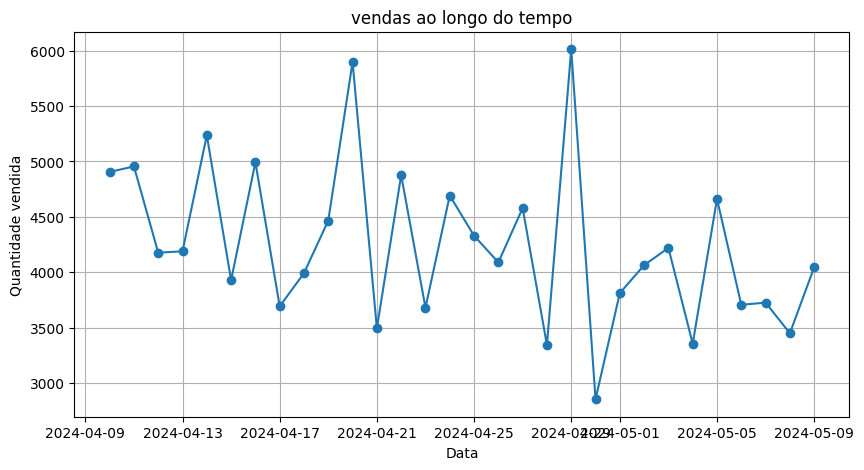


Analise de desempenho de produtos:
nome
Produto 10     28027
Produto 101    12356
Produto 102    10398
Produto 103     6795
Produto 104    12741
               ...  
Produto 92      9293
Produto 93     14092
Produto 95      1933
Produto 96     32510
Produto 99      9211
Name: valor_total, Length: 482, dtype: int64


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Lê os dados do data warehouse do arquivo CSV criado acima.
df_warehouse = pd.read_csv('data_warehouse.csv')

# Agrupa e mostra como "Análise de vendas por produto:" das vendas por nome do produto e soma as quantidades e valores totais vendidos de cada produto.
vendas_por_produto = df_warehouse.groupby('nome')[['quantidade','valor_total']].sum()
print("Análise de vendas por produto:")
print(vendas_por_produto)

# Agrupa e mostra como "Análise de vendas por categoria de produto:" das vendas por categoria de produto e soma as quantidades e valores totais vendidos de cada categoria.
vendas_por_categoria = df_warehouse.groupby('categoria')[['quantidade','valor_total']].sum()
print("\nAnálise de vendas por categoria de produto:")
print(vendas_por_categoria)

# Converte a coluna de data para o tipo datetime.
df_warehouse['data'] = pd.to_datetime(df_warehouse['data'])

# Agrupa e mostra como "Analise de tendencias temporais:" das vendas por data e soma as quantidades e valores totais vendidos de cada dia.
vendas_por_data = df_warehouse.groupby('data')[['quantidade', 'valor_total']].sum()
print("\nAnalise de tendencias temporais:")
print(vendas_por_data)

# Cria um gráfico de linha mostrando as vendas ao longo do tempo.
plt.figure(figsize=(10, 5))
plt.plot(vendas_por_data.index, vendas_por_data['quantidade'], marker='o', linestyle='-')
plt.title('vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade vendida')
plt.grid(True)
plt.show()

# Calcula e mostra o desempenho de cada um produtos somando o valor total das vendas de cada um.
desempenho_produto = df_warehouse.groupby('nome')['valor_total'].sum()
print("\nAnalise de desempenho de produtos:")
print(desempenho_produto)


DATALAKE EXEMPLO 1


In [18]:
import pandas as pd
import numpy as np
import os

# Se nao existe a pasta 'data_lake' no diretorio cria essa pasta.
if not os.path.exists('data_lake'):
  os.makedirs('data_lake')

# Vai gerar 10 arquivos.
num_files = 10
# Tera 1000 linhas por arquivo.
num_rows_per_file = 1000

# Lista para armazenar os DataFrames e nomes dos arquivos.
dfs = []

# Loop para gerar dados e salvar em arquivos CSV.
for i in range(num_files):
  # Gera dados aleatórios para cada arquivo.
  data = {
      'coluna1': np.random.randint(0, 100, num_rows_per_file),
      'coluna2': np.random.randn(num_rows_per_file),
      'coluna3': np.random.choice(['A','B','C'], num_rows_per_file)
  }

  # Cria um DataFrame a partir dos dados gerados.
  df = pd.DataFrame(data)

  # Define o nome do arquivo usando o número do loop.
  file_name = f'data_lake/dados_{i+1}.csv'

  # Salva o DataFrame no arquivo CSV.
  df.to_csv(file_name, index=False)

  # Adiciona o nome do arquivo e o DataFrame à lista 'dfs'.
  dfs.append((file_name, df))

# Mensagem de confirmação após a geração dos dados.
print("Dados do Data Lake gerados com sucesso!")

# Loop para imprimir os cinco primeiros registros de cada DataFrame.
for file_name, df in dfs:
  print(f"\nDados do arquivo: {file_name}\n")
  print(df.head())


Dados do Data Lake gerados com sucesso!

Dados do arquivo: data_lake/dados_1.csv

   coluna1   coluna2 coluna3
0       28  0.290828       C
1       26 -0.084138       B
2       62 -1.101344       A
3       37  0.486523       B
4       76  0.198467       C

Dados do arquivo: data_lake/dados_2.csv

   coluna1   coluna2 coluna3
0       49  1.175125       C
1       79 -1.506529       A
2       14  0.089700       C
3       88  0.140695       A
4       93  0.899026       A

Dados do arquivo: data_lake/dados_3.csv

   coluna1   coluna2 coluna3
0       75  0.087290       B
1       75 -0.943619       C
2       90  0.938877       A
3       16  2.542065       A
4       76  0.834628       A

Dados do arquivo: data_lake/dados_4.csv

   coluna1   coluna2 coluna3
0       61  0.339332       C
1       83  0.372102       B
2       49 -1.266820       A
3       28 -0.243359       B
4        8 -1.535511       C

Dados do arquivo: data_lake/dados_5.csv

   coluna1   coluna2 coluna3
0       70 -0.925097     

DATALAKE EXEMPLO 2


Primeiras linhas do Data Frame:
   coluna1   coluna2 coluna3
0        1 -0.040689       A
1       45  0.652619       B
2       99 -2.440039       C
3       40 -1.084704       C
4       51  0.498269       A

Informações sobre o Data Frame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coluna1  1000 non-null   int64  
 1   coluna2  1000 non-null   float64
 2   coluna3  1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB
None

 Resumo estatístico do Data Frame:
           coluna1      coluna2
count  1000.000000  1000.000000
mean     50.799000    -0.009940
std      29.266074     1.033082
min       0.000000    -3.161762
25%      27.000000    -0.696628
50%      51.000000    -0.021096
75%      76.000000     0.700417
max      99.000000     3.035270


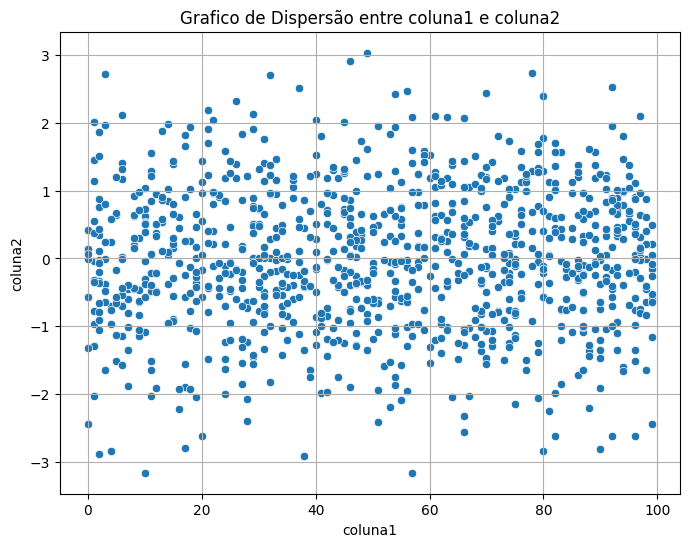

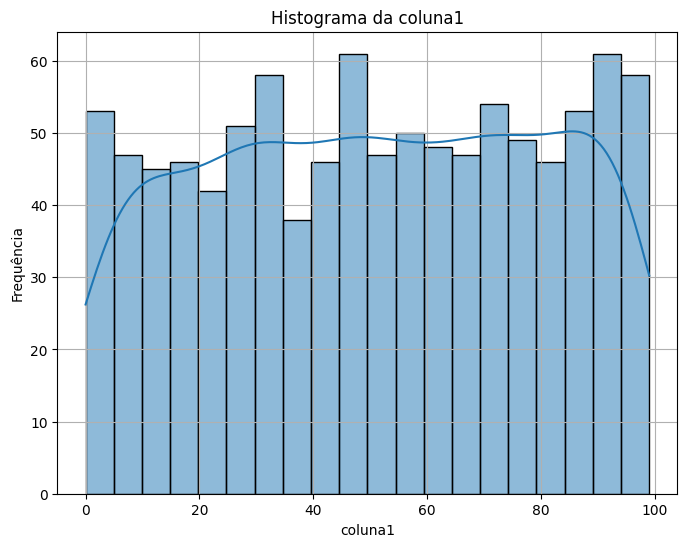

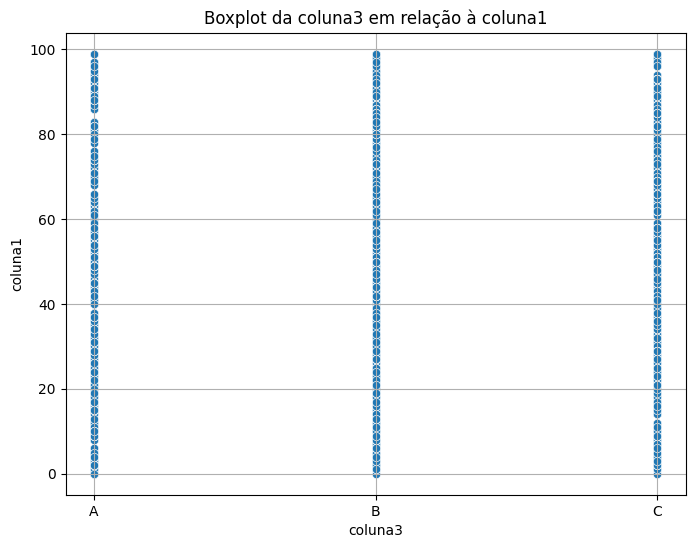

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from sqlalchemy import inspect

# Carrega os dados dos arquivos CSV para o banco de dados
conn_string = 'sqlite:///data_lake.db'

# Cria o motor (engine) de conexão com o banco de dados
engine = create_engine(conn_string)

# Cria um objeto de inspeção do banco de dados
inspector = inspect(engine)

# Define o nome da tabela com base no índice e verifica se a tabela já existe no banco de dados
for i, (file_name, df) in enumerate(dfs):
    table_name = f'dados_{i + 1}'
    # Se não existe, salva os dados da DataFrame na tabela
    if not inspector.has_table(table_name):
        df.to_sql(table_name, engine, index=False)

#Esta nomeando a tabela como dados_1 e lê os dados da tabela do banco de dados e carrega em DataFrame.
table_name = 'dados_1'
df = pd.read_sql_table(table_name, engine)


#Exibe primeiras linhas do Data Frame
print("Primeiras linhas do Data Frame:")
print(df.head())

#Exibe informações sobre o DataFrame
print("\nInformações sobre o Data Frame:")
print(df.info())

#Exibe um resumo estatístico do DataFrame
print("\n Resumo estatístico do Data Frame:")
print(df.describe())

#Cria e exibe o gráfico de dispersão entre as colunas 'coluna1' e 'coluna2'.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='coluna1', y='coluna2', data=df)
plt.title('Grafico de Dispersão entre coluna1 e coluna2')
plt.xlabel('coluna1')
plt.ylabel('coluna2')
plt.grid(True)
plt.show()

# Cria e exibe o histograma da coluna 'coluna1'.
plt.figure(figsize=(8, 6))
sns.histplot(df['coluna1'], bins=20, kde=True)
plt.title('Histograma da coluna1')
plt.xlabel('coluna1')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


#Cria e exibe o boxplot da coluna 'coluna3' em relação à coluna 'coluna1'.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='coluna3', y='coluna1', data=df)
plt.title('Boxplot da coluna3 em relação à coluna1')
plt.xlabel('coluna3')
plt.ylabel('coluna1')
plt.grid(True)
plt.show()